# Importing the libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
import os

# Stage 1 - Sourcing and loading data

## 1a. Source and load the data

In [17]:
Google = pd.read_csv('googleplaystore.csv')
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [10]:
print(os.getcwd())

C:\Users\BIN


In [25]:
Apple = pd.read_csv('AppleStore.csv')
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [26]:
Google = pd.read_csv('googleplaystore.csv')
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## 1b. Pick the columns we'll work with 

## 1c. Subsetting accordingly 

In [28]:
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head()

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0


In [31]:
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


# Stage 2 - Cleaning, transforming and visualizing

## 2a. Check the data types for both Apple and Google, and fix them

In [37]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [38]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [39]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [67]:
Google[Google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [75]:
Google = Google[Google['Price'] != 'Everyone']

In [76]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [99]:
nosymb = Google['Price'].str.replace('$','')
Google['Price'] = pd.to_numeric(nosymb)

AttributeError: Can only use .str accessor with string values!

In [101]:
Google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [103]:
Google['Price'].dtype

dtype('float64')

In [108]:
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [109]:
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

## 2b. Add a platform column to both the Apple and the Google dataframes 

In [111]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'
Apple.head()

,prime_genre,user_rating,rating_count_tot,price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


## 2c. Changing the column names to prepare for our join of the two datasets 

In [119]:
old_names = Apple.columns
new_names = Google.columns

In [121]:
Apple = Apple.rename(columns = dict(zip(old_names, new_names)))
Apple.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


## 2d. Join the datasets

In [123]:
df = Google.append(Apple)
df.sample(12)

,Category,Rating,Reviews,Price,platform
1472,Education,0.0,0,4.99,apple
5118,Utilities,3.0,684,1.99,apple
2016,FAMILY,4.5,4449910,0.00,google
7612,FAMILY,4.5,773,0.00,google
9527,FAMILY,NaN,2,0.00,google
8477,SPORTS,3.9,255,0.00,google
4158,Games,0.0,0,0.00,apple
8867,SPORTS,4.1,10,0.00,google
1370,HEALTH_AND_FITNESS,4.0,267,0.00,google
944,ENTERTAINMENT,3.9,61201,0.00,google


## 2e. Eliminate the NaN values

In [126]:
df.shape

(18037, 5)

In [130]:
df = df.dropna()

In [131]:
df.shape

(16563, 5)

## 2f. Filter the data so that we only see whose apps that have been reviewed at least once

In [134]:
df[df['Reviews'] == 0]

,Category,Rating,Reviews,Price,platform
199,Finance,0.0,0,3.99,apple
301,Book,0.0,0,3.99,apple
330,Travel,0.0,0,7.99,apple
441,Navigation,0.0,0,0.00,apple
452,Education,0.0,0,3.99,apple
...,...,...,...,...,...
7181,Games,0.0,0,0.99,apple
7182,Photo & Video,0.0,0,0.00,apple
7184,Games,0.0,0,0.00,apple
7185,Games,0.0,0,0.99,apple


In [136]:
df = df[df['Reviews'] != 0]

## 2g. Summarize the data visually and analystically (by the column platform)

In [143]:
df.groupby('platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [147]:
df.groupby('Category')['Rating'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,62.0,4.358065,0.358297,3.2,4.1,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.0,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.0,4.3,4.575,4.9
BOOKS_AND_REFERENCE,178.0,4.346067,0.429046,2.7,4.1,4.5,4.600,5.0
BUSINESS,303.0,4.121452,0.624422,1.0,3.9,4.3,4.500,5.0


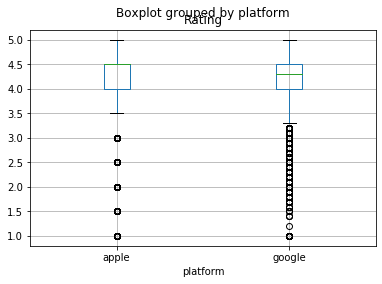

In [150]:
df.boxplot(by = 'platform', column = 'Rating')

# Stage 3 - Modeling

## 3a. Hypothesis formulation

## 3b. Getting the distribution of the Data

In [155]:
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']

In [156]:
apple_normal = stats.normaltest(apple)
apple_normal

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)

In [157]:
google_normal = stats.normaltest(google)
google_normal

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)

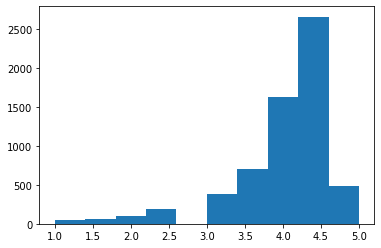

In [161]:
histApple = plt.hist(apple)

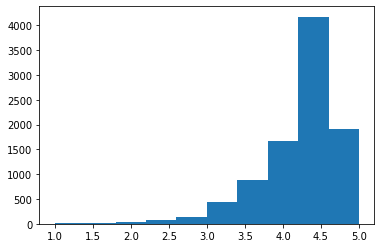

In [162]:
histoGoogle = plt.hist(google)

## 3c. Permutation test 

In [190]:
df['Permutation1'] = np.random.permutation(df['Rating'])
df.head(5)

,Category,Rating,Reviews,Price,platform,Permutation1
0,ART_AND_DESIGN,4.1,159,0.0,google,2.6
1,ART_AND_DESIGN,3.9,967,0.0,google,4.7
2,ART_AND_DESIGN,4.7,87510,0.0,google,2.5
3,ART_AND_DESIGN,4.5,215644,0.0,google,5.0
4,ART_AND_DESIGN,4.3,967,0.0,google,4.0


In [178]:
df.groupby(by = 'platform').describe()

Rating                                              Reviews  \
           count      mean       std  min  25%  50%  75%  max   count   
platform                                                                
apple     6268.0  4.049697  0.726943  1.0  4.0  4.5  4.5  5.0  6268.0   
google    9366.0  4.191757  0.515219  1.0  4.0  4.3  4.5  5.0  9366.0   

                         ... Price         Permutation1                      \
                   mean  ...   75%     max        count      mean       std   
platform                 ...                                                  
apple      14803.805520  ...  2.99  299.99       6268.0  4.134556  0.623751   
google    514049.836536  ...  0.00  400.00       9366.0  4.134967  0.605652   

                                   
          min  25%  50%  75%  max  
platform                           
apple     1.0  4.0  4.3  4.5  5.0  
google    1.0  4.0  4.3  4.5  5.0  

[2 rows x 32 columns]

In [174]:
df.groupby(by = 'platform')['Permutation1'].describe() 

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.134556,0.623751,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.134967,0.605652,1.0,4.0,4.3,4.5,5.0


In [176]:
df.groupby(by = 'platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


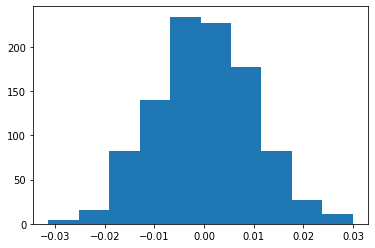

In [183]:
difference = []
for i in range (1000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform'] == 'apple']) - np.mean(permutation[df['platform'] == 'google']))
histo = plt.hist(difference)

In [185]:
obs_difference = np.mean(apple) - np.mean(google)
obs_difference = abs(obs_difference)
obs_difference

0.14206054745123442